# **教材 4-25 题的解题报告**

$$
$$

## **一、解题思路**

### 1. 题目分析

$$
$$

### 2. 解题方法

$$
$$

## **二、数值方法**

### 1. 数值公式和方程的导出

- #### 非均匀网格的二阶空间导数

由于这是多层材料的导热问题，且材料的厚度不相同，为了达到相当的分析精细度和更高的局部分辨率，我们可能需要支持非均匀分布的网格。下面我将推导非均匀网格二阶空间导数的二阶精度有限差分格式。

首先，使用泰勒级数在 $T_{m}$ 位置展开 $T_{m-1}$ 和 $T_{m+1}$ ：

$$
\newcommand{\pd}[2]{\dfrac{\partial #1}{\partial #2}}
\newcommand{\cvb}[1]{\left.#1\right|}
\begin{cases}
T_{m-1} = T_{m} - \cvb{\pd{T}{x}}_{m} \cdot h_{L} + \cvb{\pd{^2T}{x^2}}_{m} \cdot \dfrac{h^2_{L}}{2} + O(h^3_L) \\[8px]
T_{m+1} = T_{m} + \cvb{\pd{T}{x}}_{m} \cdot h_{R} + \cvb{\pd{^2T}{x^2}}_{m} \cdot \dfrac{h^2_{R}}{2} + O(h^3_R) \\[8px]
\end{cases}\tag{1}
$$

我们令：

$$S = A \cdot T_{m+1} + B \cdot T_m + C \cdot T_{m-1}\tag{2}$$

代入（1）式，忽略高阶项后，可以得到：

$$
\newcommand{\pd}[2]{\dfrac{\partial #1}{\partial #2}}
\newcommand{\cvb}[1]{\left.#1\right|}
S = (A+B+C) \cdot T_m + (Ah_R - Ch_L) \cdot \cvb{\pd{T}{x}}_m + \dfrac{Ah^2_R + Ch^2_L}{2} \cdot \cvb{\pd{^2T}{x^2}}_m \tag{3}
$$

因为我们要导出的是 $
\newcommand{\pd}[2]{\dfrac{\partial #1}{\partial #2}}
\newcommand{\cvb}[1]{\left.#1\right|}\cvb{\pd{^2T}{x^2}}_m$ ，所以我们希望有 
$
\begin{cases}
A+B+C = 0 \\[8px]
Ah_R-Ch_L = 0
\end{cases}
$ ，那么：

$$
\begin{cases}
B = -A \left(1 + \dfrac{h_R}{h_L} \right) \\[8px]
C = A \cdot \dfrac{h_R}{h_L}
\end{cases}\tag{4}
$$

于是我们便得到了只有空间二阶导数的形式：

$$
\newcommand{\pd}[2]{\dfrac{\partial #1}{\partial #2}}
\newcommand{\cvb}[1]{\left.#1\right|}
S = \dfrac{Ah^2_R + Ch^2_L}{2} \cdot \cvb{\pd{^2T}{x^2}}_m = \dfrac{Ah_R (h_L+h_R)}{2} \cdot \cvb{\pd{^2T}{x^2}}_m
\tag{5}
$$

令（5）与原式（2）相等，再代入（4）消去 $B$ 和 $C$ ，得到：

$$
\newcommand{\pd}[2]{\dfrac{\partial #1}{\partial #2}}
\newcommand{\cvb}[1]{\left.#1\right|}
\cvb{\pd{^2T}{x^2}}_m = \dfrac{2}{Ah_R (h_L+h_R)} \left[ A \cdot T_{m+1} - A \left(1 + \dfrac{h_R}{h_L} \right) \cdot T_m + A \cdot \dfrac{h_R}{h_L} \cdot T_{m-1} \right]
$$

这时分子分母同时消去 $A$ ，最后整理，即可得到二阶空间导数的二阶差分格式：

$$
\newcommand{\pd}[2]{\dfrac{\partial #1}{\partial #2}}
\newcommand{\cvb}[1]{\left.#1\right|}
\boxed{
\cvb{\pd{^2T}{x^2}}_m = \dfrac{2}{h_L h_R (h_L+h_R)} \left[ h_L \cdot T_{m+1} - (h_L+h_R) \cdot T_m + h_R \cdot T_{m-1} \right]\tag{6}
}
$$

后文将会大量用到这个结论。

- #### 网格中间节点处的离散控制方程

（网格示意图）

为减小数值耗散误差并便于后续对导热量进行时间积分，本文的控制方程均采用时间与空间均为二阶精度的 Crank-Nicolson 格式进行离散，时间导数应写成 $_{i+\frac{1}{2}}$ 位置的中心差分形式，而空间导数应取 $_{i}$ 和 $_{i+1}$ 的平均：

$$
\newcommand{\pd}[2]{\dfrac{\partial #1}{\partial #2}}
\newcommand{\cvb}[1]{\left.#1\right|}
\cvb{\pd{T}{\tau}}_{m,~i+\frac{1}{2}} = a \cdot \cvb{\pd{^2T}{x^2}}_{m,~i+\frac{1}{2}}\tag{7}
$$

其中，

$$
\text{LHS} \approx \dfrac{T^{(i+1)}_{m}-T^{(i)}_{m}}{\Delta \tau}\tag{8}
$$
$$
\newcommand{\pd}[2]{\dfrac{\partial #1}{\partial #2}}
\newcommand{\cvb}[1]{\left.#1\right|}
\text{RHS} \approx \dfrac{1}{2} \left( \cvb{\pd{^2T}{x^2}}_{m,~i} + \cvb{\pd{^2T}{x^2}}_{m,~i+1} \right)
= \dfrac{a}{h_L h_R (h_L+h_R)} \left[ h_L \cdot (T^{(i+1)}_{m+1}+T^{(i)}_{m+1}) - (h_L+h_R) \cdot (T^{(i+1)}_m+T^{(i)}_m) + h_R \cdot (T^{(i+1)}_{m-1}+T^{(i)}_{m-1}) \right]\tag{9}
$$

然后方程左边等于右边，可以得到：

$$
\newcommand{\pd}[2]{\dfrac{\partial #1}{\partial #2}}
\newcommand{\cvb}[1]{\left.#1\right|}
\boxed{
\dfrac{T^{(i+1)}_{m}-T^{(i)}_{m}}{\Delta \tau}=\dfrac{a}{h_L h_R (h_L+h_R)} \left[ h_L \cdot (T^{(i+1)}_{m+1}+T^{(i)}_{m+1}) - (h_L+h_R) \cdot (T^{(i+1)}_m+T^{(i)}_m) + h_R \cdot (T^{(i+1)}_{m-1}+T^{(i)}_{m-1}) \right]
}\tag{10}
$$

最后提取合并 $T^{(i+1)}_m$ 项，整理为隐式格式，此处不加赘述。

- #### 网格左边界节点处的离散控制方程

（网格示意图）

左边界是辐射和对流的组合边界条件，其节点温度仍受非稳态导热控制方程 $\newcommand{\pd}[2]{\dfrac{\partial #1}{\partial #2}}
\newcommand{\cvb}[1]{\left.#1\right|}\pd{T}{\tau}=a\pd{^2T}{x^2}$ 控制，不能遗漏控制方程左侧的非稳态项。

为了维持二阶精度，我们使用虚拟点法推导左边界节点处的离散控制方程。

我们在左边界节点 $T_m$ 左侧 $\Delta x=h_R$ 处虚拟一个节点 $T_{m-1}$ ，那么便有以下包含中心差分格式的式子成立：

$$
\newcommand{\pd}[2]{\dfrac{\partial #1}{\partial #2}}
\newcommand{\cvb}[1]{\left.#1\right|}
\cvb{\pd{T}{x}}_m = \dfrac{\dot{Q}_m}{\lambda} \approx \dfrac{T_{m+1}-T_{m-1}}{2\Delta x}\tag{11}
$$

其中，$$\dot{Q}_m = \left[ 1.12\times(T_m-T_f)^{\frac{1}{3}} + 4\times\varepsilon\sigma_0 \left( \dfrac{T_m+T_f}{2} \right)^3 \right](T_m-T_f)\tag{12}$$

（11）移项得到：

$$
T_{m-1}=T_{m+1} - 2 \cdot \Delta x \left( \dfrac{\dot{Q}_m}{\lambda} \right)\tag{13}
$$

结合前面的结论（10），易得：

$$
\boxed{
\dfrac{T^{(i+1)}_{m}-T^{(i)}_{m}}{\Delta \tau}=\dfrac{a}{\Delta x^2} \left[ (T^{(i+1)}_{m+1}+T^{(i)}_{m+1}) - (T^{(i+1)}_m+T^{(i)}_m) - \Delta x (\dfrac{\dot{Q}^{(i+1)}_m}{\lambda}+\dfrac{\dot{Q}^{(i)}_m}{\lambda}) \right]
}\tag{14}
$$

显然，通过虚拟点处理后，（14）达到了时间和空间二阶精度。最后整理为隐式格式的过程省略。

- #### 网格跨界面节点处的离散控制方程

（网格示意图）

由于物性参数在界面处发生阶跃变化（不可导），直接从控制方程开始推导比较困难，实际也难以从热扩散率 $a$ 中分离 $\lambda$ 和 $\rho c$ 。所以，我们在界面节点处取控制体积，使用能量守恒法推导该位置的离散控制方程。

根据能量守恒的思想，控制体总能的增量应等于进出控制体左右两边界的热量净差，则：

$$
\underbrace{\overbrace{\left( \dfrac{\rho_L c_L h_L}{2} + \dfrac{\rho_R c_R h_R}{2} \right)}^{\textbf{能量具有可加性}} \dfrac{T^{(i+1)}_{m}-T^{(i)}_{m}}{\Delta \tau}}_{\textbf{控制体总能增量}} = 
\underbrace{\lambda_R \cdot \dfrac{T^{(i+1)}_{m+1}-T^{(i+1)}_{m}}{h_R} - \lambda_L \cdot \dfrac{T^{(i+1)}_{m}-T^{(i+1)}_{m-1}}{h_L}}_{\textbf{进出热量净差}}\tag{15}
$$

然后，我们可以合理改写成 Crank-Nicolson 格式：

$$
\boxed{
\dfrac{T^{(i+1)}_{m}-T^{(i)}_{m}}{\Delta \tau} = \dfrac{1}{\rho_L c_L h_L + \rho_R c_R h_R} \left[
\dfrac{\lambda_R}{h_R} \left( T^{(i+1)}_{m+1}-T^{(i+1)}_{m} + T^{(i)}_{m+1}-T^{(i)}_{m} \right)
-\dfrac{\lambda_L}{h_L} \left( T^{(i+1)}_{m}-T^{(i+1)}_{m-1} + T^{(i)}_{m}-T^{(i)}_{m-1} \right)\right]
}\tag{16}
$$

显然，（16）也是时间和空间二阶精度的格式，同样整理为隐式格式，过程略。

- #### 网格右边界条件

右边界是第一类边界条件，是控制方程的定解条件，节点温度不受控制方程控制。

因此直接给定温度即可：
$$
T_m = T_w \tag{17}
$$

- #### 热量的数值计算式

涉及能量的数值计算需要保证能量守恒，因此应该使用“守恒型”差分格式。下面我将分别导出三种情况的导热量数值计算式。

1. 中间节点：

中心差分是“守恒型”差分，自然满足能量守恒。因此，中间节点的导热量为：

$$
\boxed{
\dot{Q}_{m} = \dfrac{\lambda \cdot 1}{2 h} (T_{m+1}-T_{m-1})
}\tag{18}
$$

2. 右边界节点：

由于节点位于边界处，无法直接应用中心差分格式。我们也不应该使用两点向前差分或者三点向前差分，因为这些均不是“守恒型”差分格式。尽管如此，我们仍可以通过取边界节点有限体积构造能量守恒方程。

已知一维非稳态导热问题的控制方程为：

$$
\newcommand{\pd}[2]{\dfrac{\partial #1}{\partial #2}}
\newcommand{\cvb}[1]{\left.#1\right|}
\pd{T}{\tau} = a \cdot \pd{^2T}{x^2}\tag{19}
$$

将控制方程写成控制体积能量守恒的形式：

$$
\rho c \cdot \dfrac{\mathrm{d}T_m}{\mathrm{d}\tau} = -\dfrac{q_{m+\frac{1}{2}} - q_{m-\frac{1}{2}}}{\Delta x}\tag{20}
$$

如图，取右边界节点的控制体积：

（控制体积示意图）

那么根据（20），可以得到该控制体的能量守恒方程：

$$
\dfrac{\rho c \Delta x}{2} \cdot \dfrac{\mathrm{d}T_m}{\mathrm{d}\tau} = -(q_{m-\frac{1}{2}} - q_{m})\tag{21}
$$

同时对方程两边积分，得到：

$$
\dfrac{\rho c \Delta x}{2} \cdot \Delta T_m = \dfrac{\lambda}{\Delta x}\int^t_0 \left[T_m(\tau) - T_{m-1}(\tau)\right]\mathrm{d}\tau - Q_m
\tag{22}
$$

又由于右边界为第一类边界条件，控制体 $\Delta T_m ≡ 0$ ，所以整理得到热量计算式：

$$
\boxed{
Q_m = \dfrac{\lambda}{\Delta x}\int^t_0 \left[T_m(\tau) - T_{m-1}(\tau)\right]\mathrm{d}\tau
}\tag{23}
$$

3. 左边界节点：

取左边界节点的控制体积：

（控制体积示意图）

同理，由能量守恒方程可以得到热量计算式：

$$
\boxed{
Q_m = \dfrac{\rho c \Delta x}{2} \cdot \Delta T_m + \dfrac{\lambda}{\Delta x}\int^t_0 \left[T_{m+1}(\tau) - T_{m}(\tau)\right]\mathrm{d}\tau
}\tag{24}
$$

左边界是对流辐射复合边界条件，所以控制体 $\Delta T_m$ 不为 $0$ 。

4. 界面点：

根据（20）能量守恒方程，参考（15），使用中心差分易将界面节点的导热量表示为：

$$
\boxed{
\dot{Q}_m = \dfrac{\lambda_L \cdot 1}{2h_L}(T_{m+1}-T_m) + \dfrac{\lambda_R \cdot 1}{2h_R}(T_{m}-T_{m-1})
}\tag{25}
$$

- #### 计算热量的数值积分方法

同样地，为了保持二阶精度，我们使用梯形积分法，对导热量做时间上的数值积分。

$$
\boxed{
Q_m(t) = \int^t_0 \dot{Q}_m \mathrm{d}\tau = \sum^{n\Delta\tau}_{i=1} \dfrac{\Delta\tau}{2} \left( \dot{Q}^{(i)}_m + \dot{Q}^{(i-1)}_m \right)
}\tag{22}
$$

$$
$$

### 2. 高斯赛德尔迭代求解器

- #### 求解器的编程实现

求解器使用 `Python` 语言实现，算法全部由自主设计、完全透明。

需要的库为 `numpy` 数值计算库和 `jit` 字节码编译库，前者提供矩阵和基本运算支持，后者提供运算加速：

In [1]:
import numpy as np     # 数值计算库
from numba import jit  # 字节码编译库

下面是迭代求解器的完整实现：

In [2]:
@jit(nopython=True)
def GaussSeidelSolver(param,                                 # 层参数
                      mesh,                                  # 空间网格
                      Δτ,                                    # 时间步长
                      auto_stop=True,
                      time_step_maximum=5000000,             # 最大的时间计算步数
                      iteration_step_maximum=1000,           # 最大的迭代计算次数
                      iteration_convergent_threshold=1e-13,  # 迭代解的收敛阈值
                      system_convergent_threshold=1e-13      # 系统收敛阈值
                      ):

    # 常值参数
    ε = 0.9               # 左壁面发射率
    σ = 5.670374419e-08   # 斯特藩-玻尔兹曼常数
    T_f = 293.15          # 环境温度
    T_w = 823.15          # 内壁温度
    
    # 处理传入的可迭代对象
    n = 0                                       # 计算导热材料的层数
    for i in param:
        n += 1
    m = 1                                       # 计算合并网格的空间节点数
    interface_idx = np.zeros(n,dtype=np.int32)  # 记录界面位置的节点索引
    j = 0
    for i in mesh:
        m += len(i)-1
        interface_idx[j] = m-1
        j += 1
    
    # 日志数据
    max_iteration_step = 0  # 本次求解的最大迭代次数
    max_norm = 0            # 本次解收敛的最大范数
    failure_cnt = 0         # 本次求解的失败次数计数器
    
    # 节点温度矩阵（行是时间，列是空间）
    T = np.zeros((time_step_maximum+1,m))
    
    # 启动条件
    T[:,:] = T_f   # 初始条件和初始猜测设为常温
    T[0,-1] = T_w  # 初始条件：第一类边界条件
    
    # 开始求解
    for t in range(0,time_step_maximum):           # 推进时间步
        
        T_ = T[t,:].copy()                         # 先赋迭代初值
        
        for i in range(0,iteration_step_maximum):  # 高斯赛德尔迭代
            
            n_idx = 0                              # 重置层索引
            _T = T_.copy()                         # 记录迭代旧值（上一轮）
            
            # 左边界：控制方程，Crank Nicolson 格式，内层 Picard 迭代，q_ 的计算使用旧值 _T
            q_ = (1.12*np.cbrt(_T[0]-T_f) + 4.0*ε*σ*np.pow(0.5*(_T[0]+T_f),3))*(_T[0]-T_f)     # 当前时间步的导热量
            _q = (1.12*np.cbrt(T[t,0]-T_f) + 4.0*ε*σ*np.pow(0.5*(T[t,0]+T_f),3))*(T[t,0]-T_f)  # 上一时间步的导热量
            a = param[0,3]/(param[0,1]*param[0,2])                                             # 热扩散率
            h = (mesh[0,1]-mesh[0,0])                                                          # 节点距离
            λ = param[0,3]                                                                     # 热导率
            T_[0] = (a*Δτ/np.pow(h,2)*((T_[1]-h*q_/λ) + (T[t,1]-T[t,0]-h*_q/λ)) + T[t,0])/(1 + a*Δτ/np.pow(h,2))
            
            # 中间部分
            for k in range(1,m-1):
                
                if k==interface_idx[n_idx]:  # 若节点在界面位置

                    # 界面点：控制方程，Crank Nicolson 格式
                    h_l = mesh[n_idx,-1]-mesh[n_idx,-2]    # 左侧节点距离
                    h_r = mesh[n_idx+1,1]-mesh[n_idx+1,0]  # 右侧节点距离
                    λ_l = param[n_idx,3]                   # 左侧热导率
                    λ_r = param[n_idx+1,3]                 # 右侧热导率
                    ρ_l = param[n_idx,1]                   # 左侧密度
                    ρ_r = param[n_idx+1,1]                 # 右侧密度
                    c_l = param[n_idx,2]                   # 左侧比热容
                    c_r = param[n_idx+1,2]                 # 右侧比热容
                    T_[k] = (T[t,k]/Δτ + 1.0/(ρ_l*c_l*h_l+ρ_r*c_r*h_r)*(λ_r/h_r*T_[k+1] + λ_l/h_l*T_[k-1] + λ_r/h_r*T[t,k+1] - (λ_r/h_r+λ_l/h_l)*T[t,k] + λ_l/h_l*T[t,k-1])) / (1.0/Δτ + 1.0/(ρ_l*c_l*h_l+ρ_r*c_r*h_r)*(λ_r/h_r+λ_l/h_l))
                    
                    n_idx += 1  # 切换层参数
                    
                else:

                    # 中间点：控制方程，热流连续，Crank Nicolson 隐式格式
                    local_idx = len(mesh[n_idx])-(interface_idx[n_idx]-k)-1  # 计算层内索引
                    h_l = mesh[n_idx,local_idx]-mesh[n_idx,local_idx-1]      # 左侧节点距离
                    h_r = mesh[n_idx,local_idx+1]-mesh[n_idx,local_idx]      # 右侧节点距离
                    a = param[n_idx,3]/(param[n_idx,1]*param[n_idx,2])       # 热扩散率
                    T_[k] = (a*Δτ/(h_l*h_r*(h_l+h_r))*((h_l*T_[k+1] + h_r*T_[k-1]) + (h_l*T[t,k+1] - (h_l+h_r)*T[t,k] + h_r*T[t,k-1]))+T[t,k])/(1.0+(a*Δτ)/(h_l*h_r))
                
            # 右边界：第一类边界，定解条件
            T_[-1] = T_w
            
            # 每轮迭代结束后，验证是否迭代收敛
            norm = np.linalg.norm(T_-_T)            # L2 范数
            err = np.max(np.abs(T_-_T)/_T)          # 更严格的收敛判据
            if err<iteration_convergent_threshold:  # 认为收敛
                
                # 记录日志
                max_iteration_step = max(i,max_iteration_step)
                max_norm = max(norm,max_norm)
                break
            
        else:  # 方程未收敛

            # 记录日志
            failure_cnt += 1
            continue
        
        # 更新温度解
        T[t+1,:] = T_
        
        # 根据左边界温度判断系统是否达到平衡
        if auto_stop and T[t+1,0]>300 and (T[t+1,0]-T[t,0])/T[t+1,0]/Δτ<system_convergent_threshold:
            break

    # 温度解，解的行索引数，解的列索引数，平衡时间，求解失败次数，求解最大迭代次数，解的最大收敛范数
    return T,t+1,m,t*Δτ,failure_cnt,max_iteration_step,max_norm

- #### 求解器泛型建模

我对求解器做了抽象和封装，支持传入任意层数、任意参数、任意网格，因此对相似的多层的一维非稳态传热问题具有很强的泛型建模和研究能力。

支持泛化特性的关键设计在于这个求解器在节点跨边界时自动切换参数和网格。然而由于边界条件的解耦过于复杂，没有做泛化实现。

- #### Gauss Seidel 迭代过程

Gauss Seidel 迭代过程是：从左往右遍历第 $^{(i)}$ 行节点，而更新第 $^{(i+1)}$ 行节点。更新节点的计算若用到左侧的节点量，需使用由本轮迭代得到的新值，而用到的右侧节点量则需使用旧值。迭代多轮，直到解收敛为止。

- #### Gauss Seidel 迭代的启动条件

（示意图）

由于 Gauss Seidel 迭代不会更新第 $^{(0)}$ 行节点，所以迭代前必须对第 $^{(0)}$ 行节点赋初值。依题意，第 $^{(0)}$ 行的初值应设为常温 $T_f$ 。

由于右边界是给定温度边界条件，是方程的定解条件，也为了在 Gauss Seidel 迭代过程保证边界条件充分生效（因为节点位于最右侧），需给右边界赋初值壁面温度 $T_i$ 。

其余节点以常温 $T_f$ 作为初始猜测，也是合理的。

- #### 非线性边界的 Picard 迭代

左边界节点是对流、辐射的组合边界：

$$\dot{Q}_m = \left[ 1.12\times(T_m-T_f)^{\frac{1}{3}} + 4\times\varepsilon\sigma_0 \left( \dfrac{T_m+T_f}{2} \right)^3 \right](T_m-T_f)$$

$$
\dfrac{T^{(i+1)}_{m}-T^{(i)}_{m}}{\Delta \tau}=\dfrac{a}{\Delta x^2} \left[ (T^{(i+1)}_{m+1}+T^{(i)}_{m+1}) - (T^{(i+1)}_m+T^{(i)}_m) - \Delta x (\dfrac{\dot{Q}^{(i+1)}_m}{\lambda}+\dfrac{\dot{Q}^{(i)}_m}{\lambda}) \right]
$$

这是一个非线性边界，我们无法直接合并方程中的 $T^{(i+1)}_m$ 项，也无法直接用高斯赛德尔迭代方法求解包含非线性的方程组。因此，我们在每轮 Gauss Seidel 迭代内部单独对左边界做 Picard 迭代，迭代更新公式形如：

$$
T^{(k+1)} = f \left[\dot{Q}\left(T^{(k)},~\dots\right),~\dots\right] \quad k\text{ 为迭代轮数}\tag{22}
$$

可见 Picard 迭代方法是令非线性项滞后一轮迭代，即冻结前一轮的迭代结果用于计算本轮迭代的非线性量，属于“不动点迭代”方法。

- #### 方程的迭代收敛判据

为了尽可能消除解方程误差，我们使用比范数更严格的判据：

$$
\forall~ T^{(k+1)}\in \mathbf{T}^{(k+1)}~，须满足 \left| \dfrac{T^{(k+1)}-T^{(k)}}{T^{(k)}} \right| <\varepsilon_e 
\text{ ，其中 }\varepsilon_e = 1.0\times10^{-13} \tag{23}
$$

- #### 系统的热平衡判据

我们选择判断左边界温度的相对变化率是否已足够小来确定系统是否达到热平衡条件：

$$
\text{须满足 }\dfrac{1}{\Delta\tau} \cdot \left| \dfrac{T^{(k+1)}_0 - T^{(k)}_0}{T^{(k)}_0} \right| < \varepsilon_b
\text{ ，其中 }\varepsilon_b = 1.0\times10^{-13}\tag{24}
$$

为了保持判据的一致性，左边界温度的相对变化率还需除以时间步长 $\Delta \tau$ 。

- #### 输出日志信息

求解器可以输出迭代收敛情况、方程的收敛范数、最大迭代次数、系统平衡时间等数据，可以初步评估解的可靠性。

$$
$$

### 3. 求解温度场

- #### 定义参数

首先，我们定义导热层参数：层厚度（δ）、材料密度（ρ）、材料比热容（c）、材料热导率（λ）。

依题意，三层导热材料的情况参数如下：

In [3]:
param_1 = np.array([[0.24, 2000.0, 1000.0, 1.6 ],   # 第一层
                    [0.24, 1800.0, 840.0,  0.8 ],   # 第二层
                    [0.04, 120.0,  800.0,  0.04]])  # 第三层（隔热层）

两层导热材料的情况参数如下：

In [4]:
param_2 = np.array([[0.24, 2000.0, 1000.0, 1.6],   # 第一层
                    [0.24, 1800.0, 840.0,  0.8]])  # 第二层

另外有些与边界条件有关的常值参数在 `GaussSeidelSolver()` 中定义。

- #### 设置网格和时间步长

（网格示意图）

由于导热层的厚度很小，为了每层达到相当的分析精细度，也为了简单起见，我们在每层设置相同分辨率的（空间）网格，层内节点均匀分布。

定义网格分辨率：

In [5]:
mesh_resolution = 20

物理含义是，每层导热材料设置有 `mesh_resolution + 1` 个节点。

定义时间步长：

In [6]:
Δτ = 10

接下来便可以分别生成两种情况的（空间）网格了：

In [7]:
mesh_1 = np.array([np.linspace(0,i[0],mesh_resolution+1) for i in param_1])  # 三层情况的空间网格
mesh_2 = np.array([np.linspace(0,i[0],mesh_resolution+2) for i in param_2])  # 两层情况的空间网格

- #### 开始求解

参数和网格设置好之后，便可以调用 `GaussSeidelSolver()` 求解温度场了。

1. 三层导热材料的情况：

In [8]:
print("三层导热材料：")

T_1, t_1, m_1, *_ = GaussSeidelSolver(param_1,mesh_1,Δτ,auto_stop=True)

if _[1]==0:
    print("方程已全部收敛")
    print(f"系统平衡时间 = {_[0]:.3e}")
    print(f"最大迭代次数 = {_[2]}")
    print(f"最大范数 = {_[3]:.3e}")
else:
    print(f"有{_[1]}个方程未收敛")
    print(f"最大范数 = {_[3]:.3e}")

print(T_1[:t_1-1,:])

三层导热材料：
方程已全部收敛
系统平衡时间 = 2.042e+06
最大迭代次数 = 26
最大范数 = 1.443e-10
[[293.15       293.15       293.15       ... 293.15       293.15
  823.15      ]
 [293.15       293.15       293.15       ... 372.90224418 583.90312352
  823.15      ]
 [293.15       293.15       293.15       ... 474.82395259 624.31478237
  823.15      ]
 ...
 [328.06864588 330.62941112 333.19017636 ... 789.00645747 806.07822874
  823.15      ]
 [328.06864588 330.62941112 333.19017636 ... 789.00645747 806.07822874
  823.15      ]
 [328.06864588 330.62941112 333.19017636 ... 789.00645747 806.07822874
  823.15      ]]


2. 两层导热材料的情况：

In [9]:
print("两层导热材料：")

T_2, t_2, m_2, *_ = GaussSeidelSolver(param_2,mesh_2,Δτ,auto_stop=False,time_step_maximum=t_1)

if _[1]==0:
    print("方程已全部收敛")
    print(f"系统平衡时间 = {_[0]:.3e}")
    print(f"最大迭代次数 = {_[2]}")
    print(f"最大范数 = {_[3]:.3e}")
else:
    print(f"有{_[1]}个方程未收敛")
    print(f"最大范数 = {_[3]:.3e}")

print(T_2[:t_2-1,:])

两层导热材料：
方程已全部收敛
系统平衡时间 = 2.042e+06
最大迭代次数 = 7
最大范数 = 2.477e-10
[[293.15       293.15       293.15       ... 293.15       293.15
  823.15      ]
 [293.15       293.15       293.15       ... 293.55196839 313.79186257
  823.15      ]
 [293.15       293.15       293.15       ... 294.69644801 332.85656435
  823.15      ]
 ...
 [373.68204573 380.8164577  387.95086967 ... 794.61235211 808.88117605
  823.15      ]
 [373.68204573 380.8164577  387.95086967 ... 794.61235211 808.88117605
  823.15      ]
 [373.68204573 380.8164577  387.95086967 ... 794.61235211 808.88117605
  823.15      ]]


两种情况的方程全部收敛，最大迭代次数合理，最大范数仅在 `1e-10` 水平（误差可以忽略不计），说明求解器能够正常工作。

我们整理程序计算得到的平衡温度为下表：

|     |     |     |平衡温度|     |     |     |     |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|情况Ⅰ|328.06864588|330.62941112|333.19017636 |...|789.00645747|806.07822874|823.15|
|情况Ⅱ|373.68204383|380.81645558|387.95086734|...|794.61235149|808.88117575|823.15|

与 CFD 仿真结果对比左边界的平衡温度：

（图）

可见，我们用程序计算的平衡温度与 CFD 模拟的平衡温度高度一致，进一步证明了该结果的准确性、可靠性。

- #### 温度场的时空分布图

接下来，我们会将温度解通过图像方式直观展示。我们需要调用 `matplotlib` 进行图形绘制。

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
from matplotlib.ticker import MultipleLocator
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

1. 三层导热材料的情况：

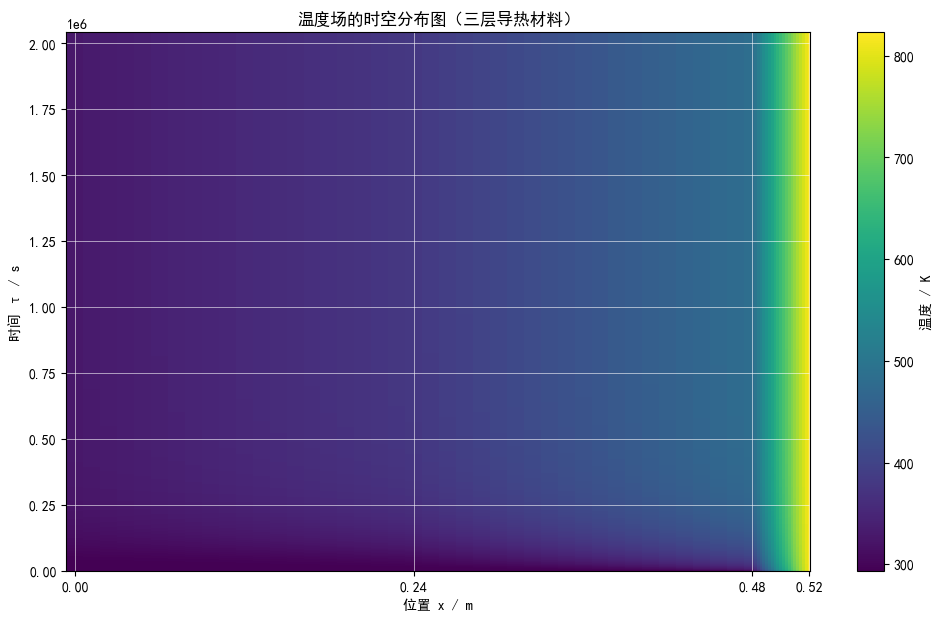

In [11]:
x = np.zeros(m_1)  # x轴
x[0] = 0
j = 1
tmp = 0
for i in mesh_1:
    for k in range(1,len(i)):
        x[j] = tmp+i[k]  # 扁平化
        j += 1
    tmp = x[j-1]
T = T_1[0:t_1:100,:]
y = np.linspace(0,int((t_1)*Δτ),T.shape[0])  # y轴

meshed_x,meshed_y = np.meshgrid(x,y)
reshaped_T = T[:T.shape[0],:].reshape(meshed_x.shape)

fig,ax = plt.subplots(figsize=(12,7))
colormesh = ax.pcolormesh(meshed_x,meshed_y,reshaped_T,cmap='viridis')
ax.grid(which='both',color='white',linestyle='-',linewidth=0.5,alpha=0.8)
bar = fig.colorbar(colormesh,label='温度 / K')
ax.set_title('温度场的时空分布图（三层导热材料）')
ax.set_xlabel('位置 x / m')
ax.set_ylabel('时间 τ / s')
ax.xaxis.set_minor_locator(FixedLocator([0,0.24,0.48,0.52]))
ax.xaxis.set_major_locator(FixedLocator([0,0.24,0.48,0.52]))
plt.show()

del x,y,meshed_x,meshed_y,reshaped_T,T

有隔热层的情况下，高温明显集中在右侧一小块区域。隔热层左界面位置温度约为 $481~\mathrm{K}$ ，说明隔热层有效阻隔了墙体的温度上升。

2. 两层导热材料的情况：

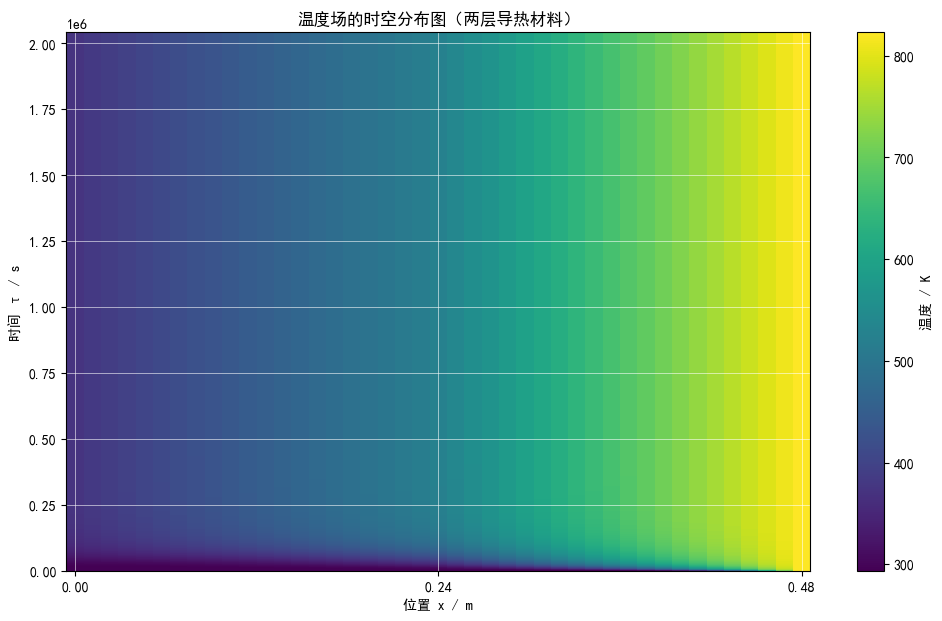

In [12]:
x = np.zeros(m_2)  # x轴
x[0] = 0
j = 1
tmp = 0
for i in mesh_2:
    for k in range(1,len(i)):
        x[j] = tmp+i[k]  # 扁平化
        j += 1
    tmp = x[j-1]
T = T_2[0:t_2:100,:]
y = np.linspace(0,int((t_2)*Δτ),T.shape[0])  # y轴

meshed_x,meshed_y = np.meshgrid(x,y)
reshaped_T = T[:T.shape[0],:].reshape(meshed_x.shape)

fig,ax = plt.subplots(figsize=(12,7))
colormesh = ax.pcolormesh(meshed_x,meshed_y,reshaped_T,cmap='viridis')
ax.grid(which='both',color='white',linestyle='-',linewidth=0.5,alpha=0.8)
bar = fig.colorbar(colormesh,label='温度 / K')
ax.set_title('温度场的时空分布图（两层导热材料）')
ax.set_xlabel('位置 x / m')
ax.set_ylabel('时间 τ / s')
ax.xaxis.set_minor_locator(FixedLocator([0,0.24,0.48]))
ax.xaxis.set_major_locator(FixedLocator([0,0.24,0.48]))
plt.show()

del x,y,meshed_x,meshed_y,reshaped_T,T

在没有隔热层的情况下，总体温度比加了隔热层的情况高了不少，高温区也明显发生左移，中心位置将近 $600~\mathrm{K}$ ；墙体升温快、达到热平衡的时间更短。

- #### 边界、界面温度随时间的变化曲线

1. 左边界（三层导热材料的情况）：

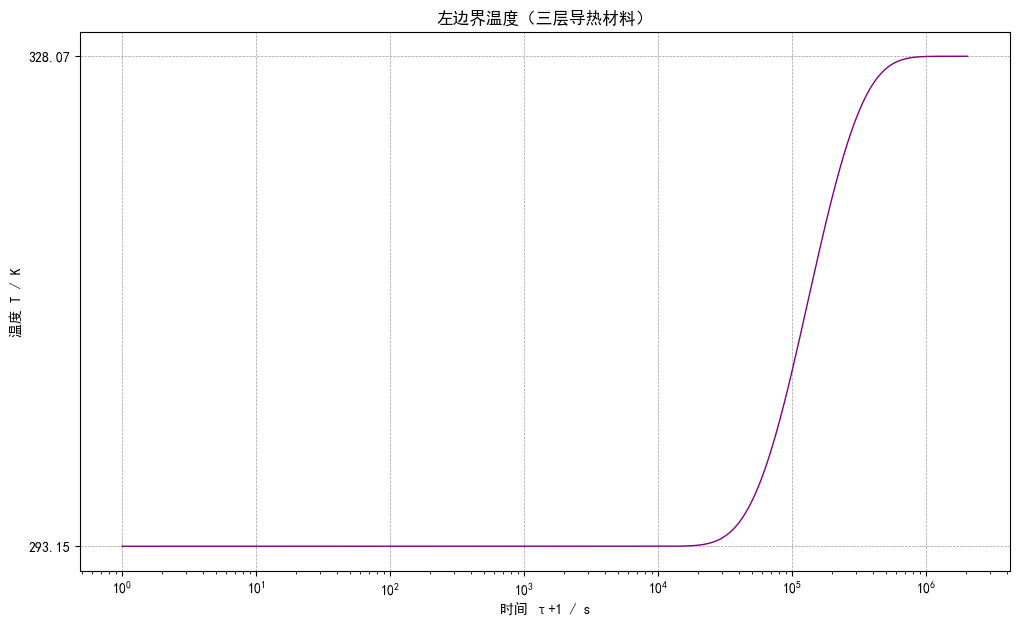

In [13]:
T = T_1[0:t_1,0]
t = np.linspace(1,t_1*Δτ+1,T.shape[0])

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t,T,color='purple',linewidth=1)
ax.set_xscale('log')
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('左边界温度（三层导热材料）')
ax.set_xlabel('时间 τ+1 / s')
ax.set_ylabel('温度 T / K')
ax.yaxis.set_major_locator(FixedLocator([293.15,328.06864588]))
plt.show()

del T,t

2. 隔热层左界面（三层导热材料的情况）：

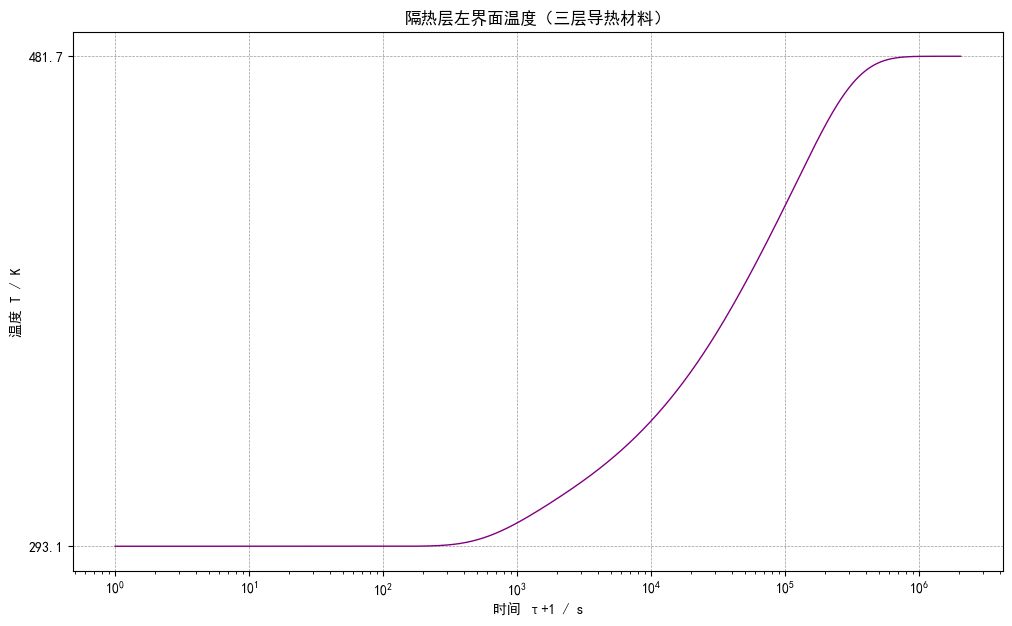

481.7145747931575


In [14]:
T = T_1[0:t_1,mesh_resolution*2]
t = np.linspace(1,t_1*Δτ+1,T.shape[0])

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t,T,color='purple',linewidth=1)
ax.set_xscale('log')
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('隔热层左界面温度（三层导热材料）')
ax.set_xlabel('时间 τ+1 / s')
ax.set_ylabel('温度 T / K')
ax.yaxis.set_major_locator(FixedLocator([293.15,481.69]))
plt.show()
print(T[-1])

del T,t

3. 左边界（两层导热材料的情况）：

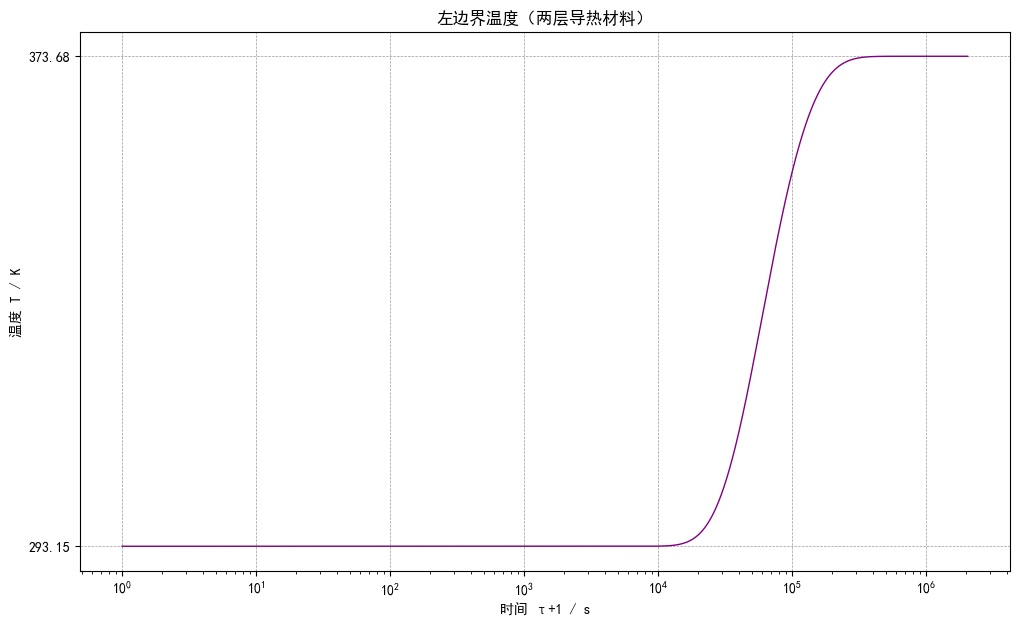

In [15]:
T = T_2[0:t_2,0]
t = np.linspace(1,t_2*Δτ+1,T.shape[0])

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t,T,color='purple',linewidth=1)
ax.set_xscale('log')
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('左边界温度（两层导热材料）')
ax.set_xlabel('时间 τ+1 / s')
ax.set_ylabel('温度 T / K')
ax.yaxis.set_major_locator(FixedLocator([293.15,373.68204383]))
plt.show()

del T,t

- #### 温度的空间扩散曲线

通过温度的空间扩散曲线，我们可以直观地观察温度空间分布随时间的变化关系。为了提高图像的可读性，我们将时间分度取对数。

1. 三层导热材料的情况：

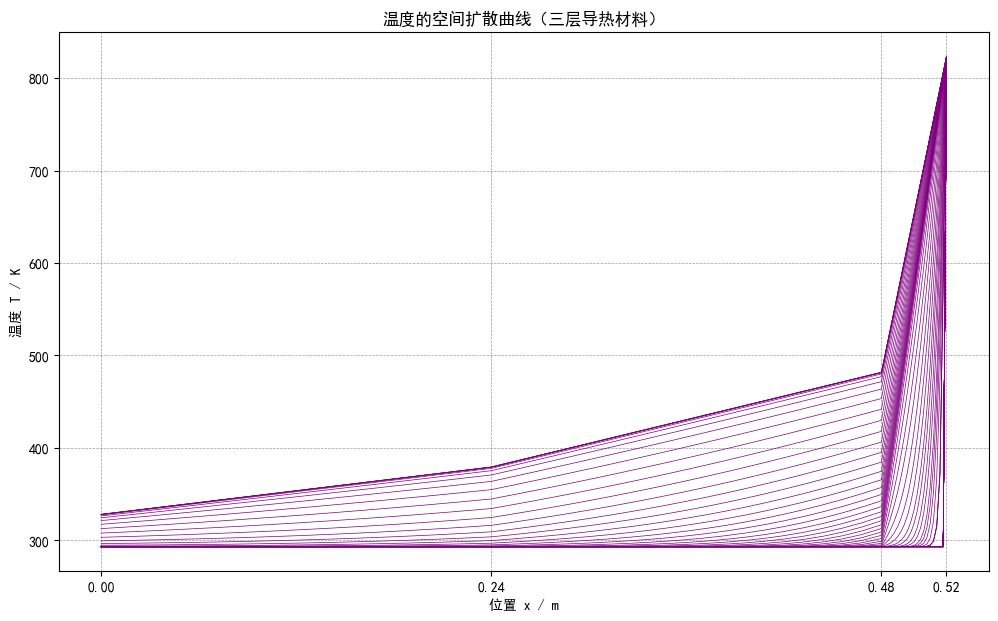

In [16]:
x = np.zeros(m_1)
x[0] = 0
j = 1
tmp = 0
for i in mesh_1:
    for k in range(1,len(i)):
        x[j] = tmp+i[k]  # 扁平化
        j += 1
    tmp = x[j-1]
t = np.logspace(np.log10(1e-6),np.log10(t_1),100)

fig,ax = plt.subplots(figsize=(12,7))
for i in range(0,len(t)):
    ax.plot(x,T_1[int(t[i]),:],color='purple',linewidth=0.5)
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('温度的空间扩散曲线（三层导热材料）')
ax.set_xlabel('位置 x / m')
ax.set_ylabel('温度 T / K')
ax.xaxis.set_major_locator(FixedLocator([0.0,0.24,0.48,0.52]))
plt.show()

del x,t

2. 两层导热材料的情况：

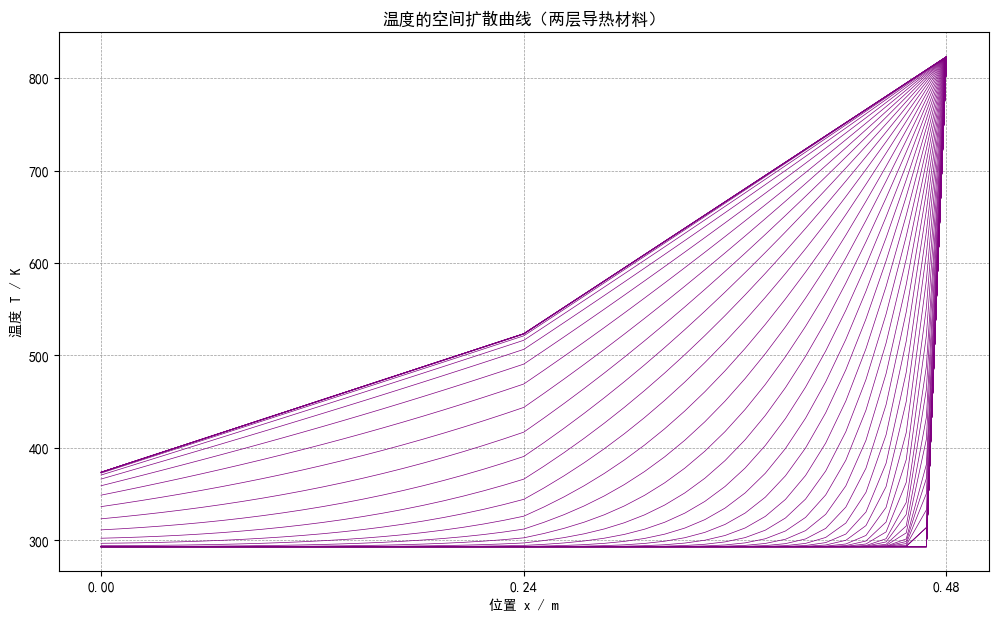

In [17]:
x = np.zeros(m_2)
x[0] = 0
j = 1
tmp = 0
for i in mesh_2:
    for k in range(1,len(i)):
        x[j] = tmp+i[k]  # 扁平化
        j += 1
    tmp = x[j-1]
t = np.logspace(np.log10(1e-6),np.log10(t_2),100)

fig,ax = plt.subplots(figsize=(12,7))
for i in range(0,len(t)):
    ax.plot(x,T_2[int(t[i]),:],color='purple',linewidth=0.5)
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('温度的空间扩散曲线（两层导热材料）')
ax.set_xlabel('位置 x / m')
ax.set_ylabel('温度 T / K')
ax.xaxis.set_major_locator(FixedLocator([0.0,0.24,0.48,0.52]))
plt.show()

del x,t

观察上图的温度平衡线，每段平衡线的斜率 $k$ 正比于各自的热导率 $\lambda$ ，符合控制方程稳态解的特征。

$$
$$

### 4. 计算通过边界的热量

- #### 边界节点导热量计算函数

1. 左边界：

左边界的导热量的计算使用公式（19）：

$$
\dot{Q}_m = \dfrac{\lambda \cdot 2}{h_R (h_R + h_{RR})} \left[ -h_{RR} T_m + (h_R + 2h_{RR}) T_{m+1} - (h_R + h_{RR}) T_{m+2} \right]
\quad\text{（左边界）}\tag{19}
$$

In [18]:
@jit(nopython=True)
def CalculateHeatTransferRateOfLeftBoundary(T,h_r,λ):
    q = np.zeros(T.shape[0])
    j = 0
    for i in T:
        q[j] = -λ*(i[0]-i[1])/h_r
        j += 1
    return q,q.shape[0]

2. 右边界

右边界的导热量计算使用公式（20）：

$$
\dot{Q}_m = \dfrac{\lambda \cdot 2}{h_L (h_L + h_{LL})} \left[ (h_L + h_{LL}) T_m - (h_L + 2h_{LL}) T_{m-1} + h_{LL} T_{m-2} \right]
\quad\text{（右边界）}\tag{20}
$$

In [19]:
@jit(nopython=True)
def CalculateHeatTransferRateOfRightBoundary(T,h_l,λ):
    q = np.zeros(T.shape[0])
    j = 0
    for i in T:
        q[j] = -λ*(i[1]-i[2])/h_l
        j += 1
    return q,q.shape[0]

- #### 计算边界导热量及其净差

1. 三层导热材料的情况：

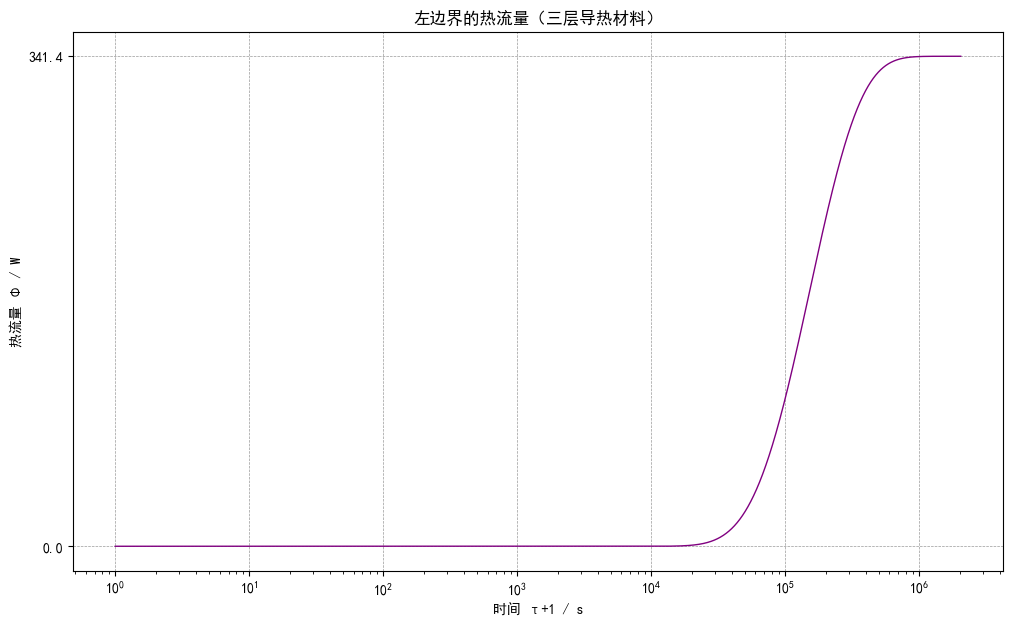

341.4353646687156


In [20]:
q_1_l,*_ = CalculateHeatTransferRateOfLeftBoundary(T_1[0:t_1,0:3],mesh_1[0,1]-mesh_1[0,0],param_1[0,3])

t = np.linspace(1,t_1*Δτ+1,_[0])

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t,q_1_l,color='purple',linewidth=1)
ax.set_xscale('log')
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('左边界的热流量（三层导热材料）')
ax.set_xlabel('时间 τ+1 / s')
ax.set_ylabel('热流量 Φ / W')
ax.yaxis.set_major_locator(FixedLocator([0.0,341.43536638444357]))
plt.show()
print(q_1_l[-1])

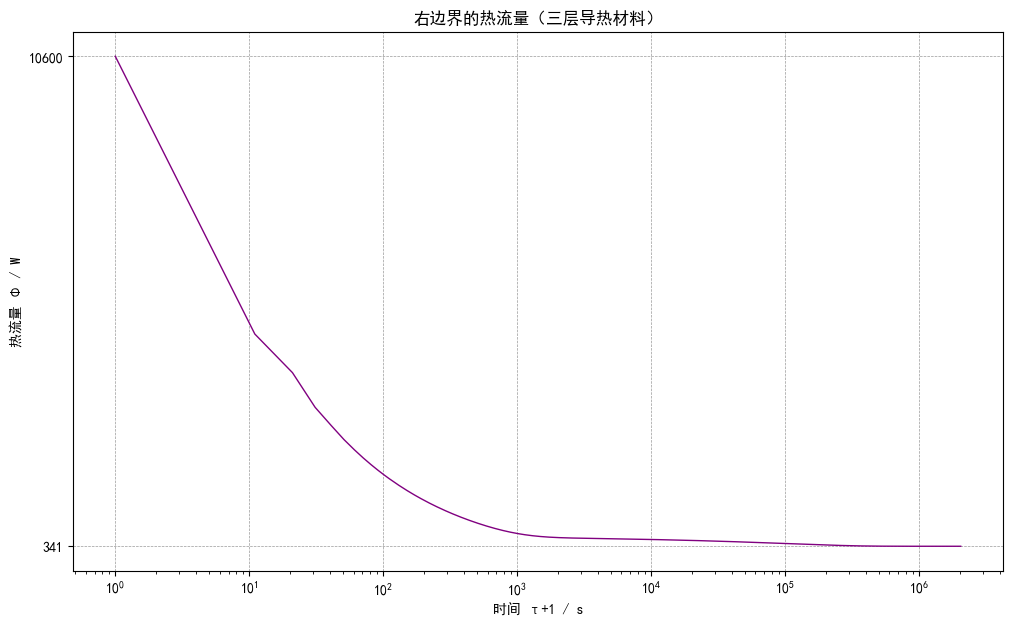

In [21]:
q_1_r,*_ = CalculateHeatTransferRateOfRightBoundary(T_1[0:t_1,-3:],mesh_1[2,-1]-mesh_1[2,-2],param_1[2,3])

t = np.linspace(1,t_1*Δτ+1,_[0])

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t,q_1_r,color='purple',linewidth=1)
ax.set_xscale('log')
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('右边界的热流量（三层导热材料）')
ax.set_xlabel('时间 τ+1 / s')
ax.set_ylabel('热流量 Φ / W')
ax.yaxis.set_major_locator(FixedLocator([341.4354252665563,21199.999999999978/2,21199.999999999978]))
plt.show()

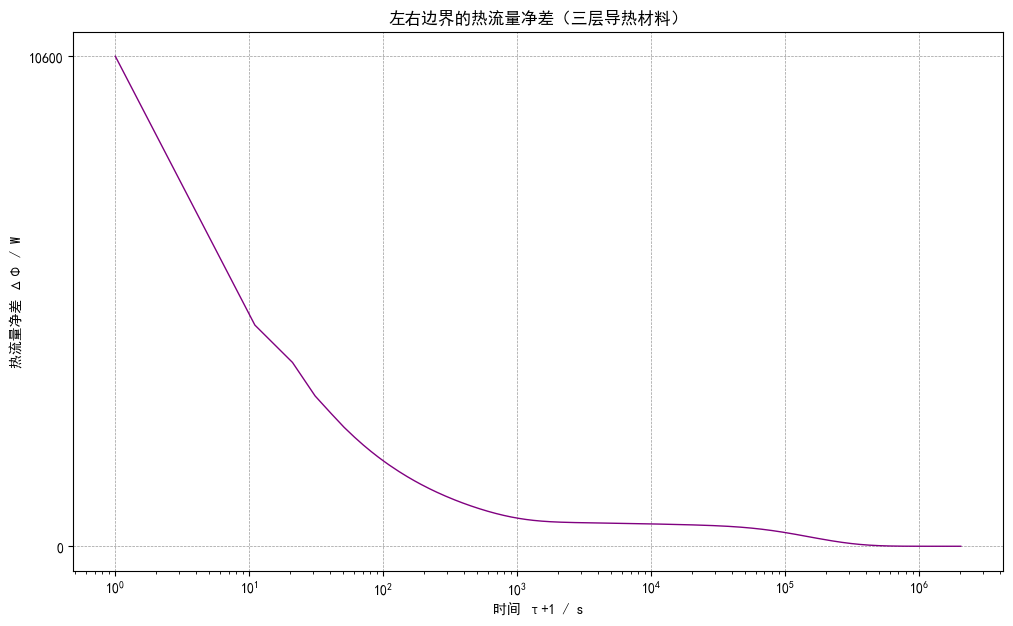

In [22]:
q_net_1 = q_1_r-q_1_l

t = np.linspace(1,t_1*Δτ+1,_[0])

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t,q_net_1,color='purple',linewidth=1)
ax.set_xscale('log')
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('左右边界的热流量净差（三层导热材料）')
ax.set_xlabel('时间 τ+1 / s')
ax.set_ylabel('热流量净差 ΔΦ / W')
ax.yaxis.set_major_locator(FixedLocator([0.0,10599.99999999999]))
plt.show()

2. 两层导热材料的情况：

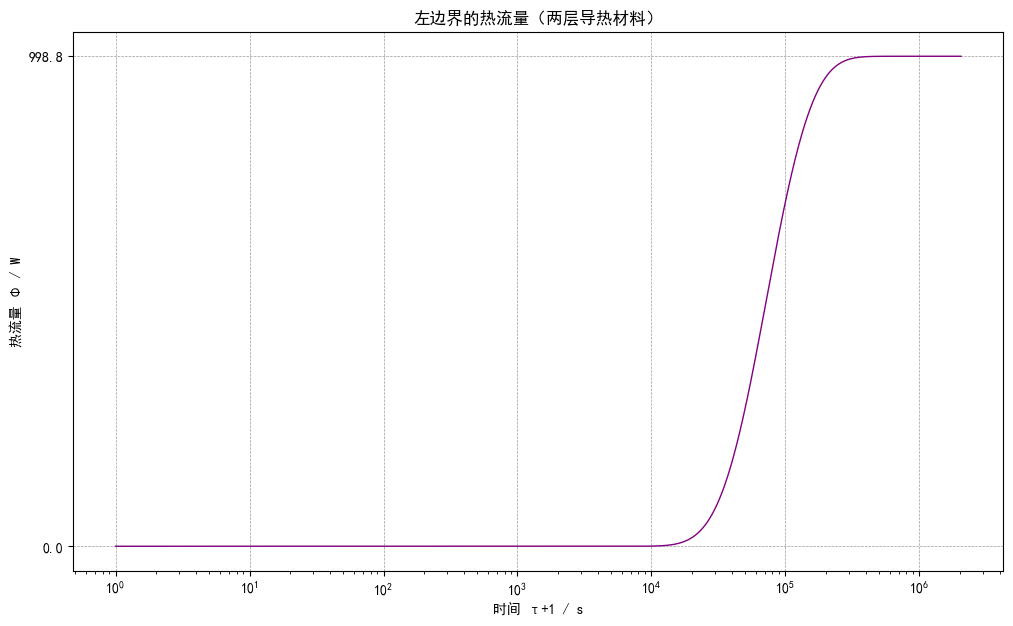

In [23]:
q_2_l,*_ = CalculateHeatTransferRateOfLeftBoundary(T_2[0:t_2,0:3],mesh_2[0,1]-mesh_2[0,0],param_2[0,3])

t = np.linspace(1,t_2*Δτ+1,_[0])

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t,q_2_l,color='purple',linewidth=1)
ax.set_xscale('log')
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('左边界的热流量（两层导热材料）')
ax.set_xlabel('时间 τ+1 / s')
ax.set_ylabel('热流量 Φ / W')
ax.yaxis.set_major_locator(FixedLocator([0.0,998.8176467595721]))
plt.show()

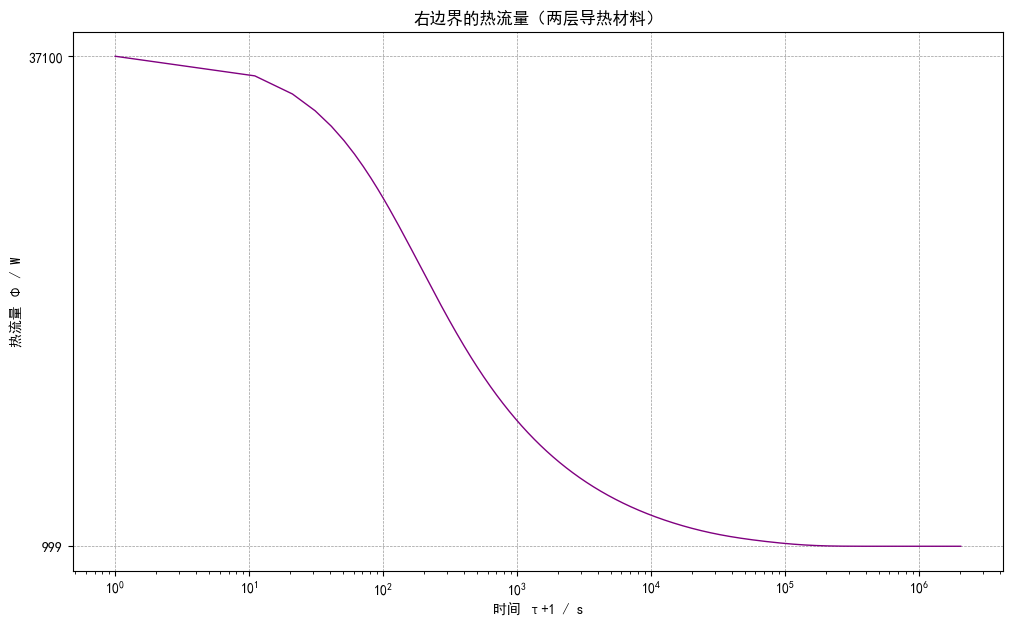

998.8176761633384


In [24]:
q_2_r,*_ = CalculateHeatTransferRateOfRightBoundary(T_2[0:t_2,-3:],mesh_2[1,-1]-mesh_2[1,-2],param_2[1,3])

t = np.linspace(1,t_2*Δτ+1,_[0])

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t,q_2_r,color='purple',linewidth=1)
ax.set_xscale('log')
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('右边界的热流量（两层导热材料）')
ax.set_xlabel('时间 τ+1 / s')
ax.set_ylabel('热流量 Φ / W')
ax.yaxis.set_major_locator(FixedLocator([998.8176467595721,37100.00000000001]))
plt.show()
print(q_2_r[-1])

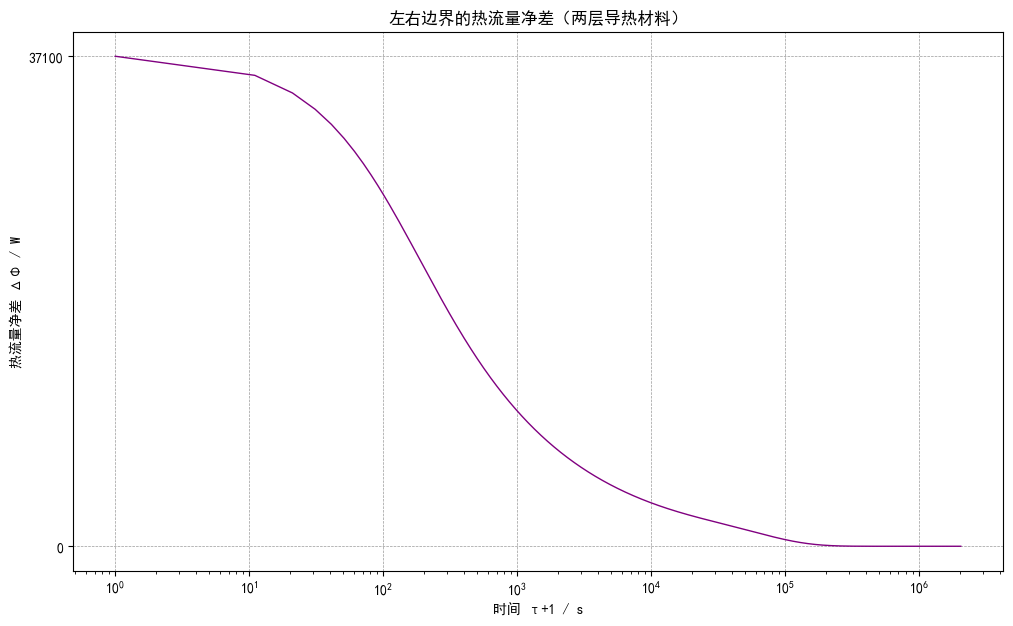

In [25]:
q_net_2 = q_2_r-q_2_l

t = np.linspace(1,t_2*Δτ+1,_[0])

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t,q_net_2,color='purple',linewidth=1)
ax.set_xscale('log')
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('左右边界的热流量净差（两层导热材料）')
ax.set_xlabel('时间 τ+1 / s')
ax.set_ylabel('热流量净差 ΔΦ / W')
ax.yaxis.set_major_locator(FixedLocator([0.0,37100]))
plt.show()

- #### 计算热量的函数

In [26]:
@jit(nopython=True)
def CalculateHeatOfRightBoundary(q,T_prev,t,Δτ,ρ,c,Δx):
    T_w=823.15
    T_f=293.15
    Q_total = 0
    Q = np.zeros(q.shape[0])
    q_prev = 0
    for i in range(0,t):
        if i==0:
            q_prev = q[i]
            Q[i] = Q_total
        else:
            q_new = q[i]
            Q_total += 0.5*(q_prev+q_new)*Δτ  # 梯形积分
            # Q[i] = Q_total
            Q[i] = Q_total+0.5*ρ*c*Δx*(0.75*T_w+0.25*T_prev[i]-T_f)
            q_prev = q_new
    return Q_total,Q,Q.shape[0]

In [27]:
@jit(nopython=True)
def CalculateHeatOfLeftBoundary(q,T,t,Δτ,ρ,c,Δx):
    Q_total = 0
    Q = np.zeros(q.shape[0])
    q_prev = 0
    for i in range(0,t):
        if i==0:
            q_prev = q[i]
            Q[i] = Q_total
        else:
            q_new = q[i]
            Q_total += 0.5*(q_prev+q_new)*Δτ  # 梯形积分
            Q[i] = Q_total-0.5*ρ*c*Δx*(T[i]-T[0])
            q_prev = q_new
    return Q_total,Q,Q.shape[0]

- #### 计算通过边界的热量

1. 左边界：

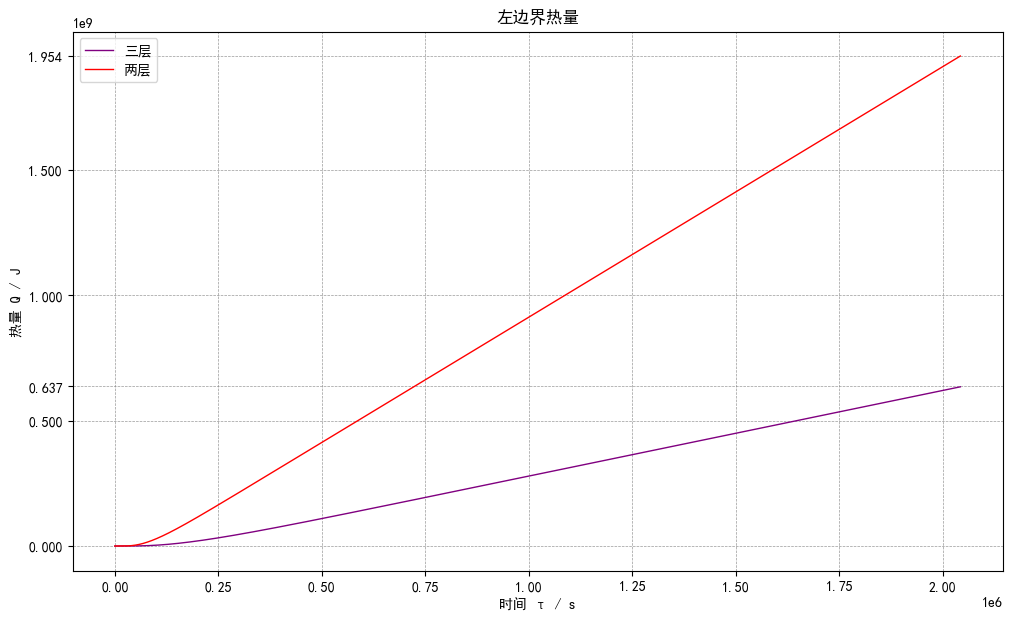

三层导热材料的情况：直到系统达到平衡时，通过左边界的总热量 = 6.351e+08
两层导热材料的情况：直到系统达到平衡时，通过左边界的总热量 = 1.954e+09


In [28]:
Q_total_1_l,Q_1_l,_t1 = CalculateHeatOfLeftBoundary(q_1_l,T_1[:,0],t_1,Δτ,param_1[0,1],param_1[0,2],mesh_1[0,1]-mesh_1[0,0])
t1 = np.linspace(0,t_1*Δτ,_t1)
Q_total_2_l,Q_2_l,_t2 = CalculateHeatOfLeftBoundary(q_2_l,T_2[:,0],t_2,Δτ,param_2[0,1],param_2[0,2],mesh_2[0,1]-mesh_2[0,0])
t2 = np.linspace(0,t_2*Δτ,_t2)

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t1,Q_1_l,color='purple',linewidth=1,label='三层')
ax.plot(t2,Q_2_l,color='red',linewidth=1,label='两层')
ax.legend()
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('左边界热量')
ax.set_xlabel('时间 τ / s')
ax.set_ylabel('热量 Q / J')
ax.yaxis.set_major_locator(FixedLocator([0.0,5e8,636929526.1404531,1e9,1.5e9,1.954e+09]))
plt.show()

print(f'三层导热材料的情况：直到系统达到平衡时，通过左边界的总热量 = {Q_total_1_l:.3e}')
print(f'两层导热材料的情况：直到系统达到平衡时，通过左边界的总热量 = {Q_total_2_l:.3e}')

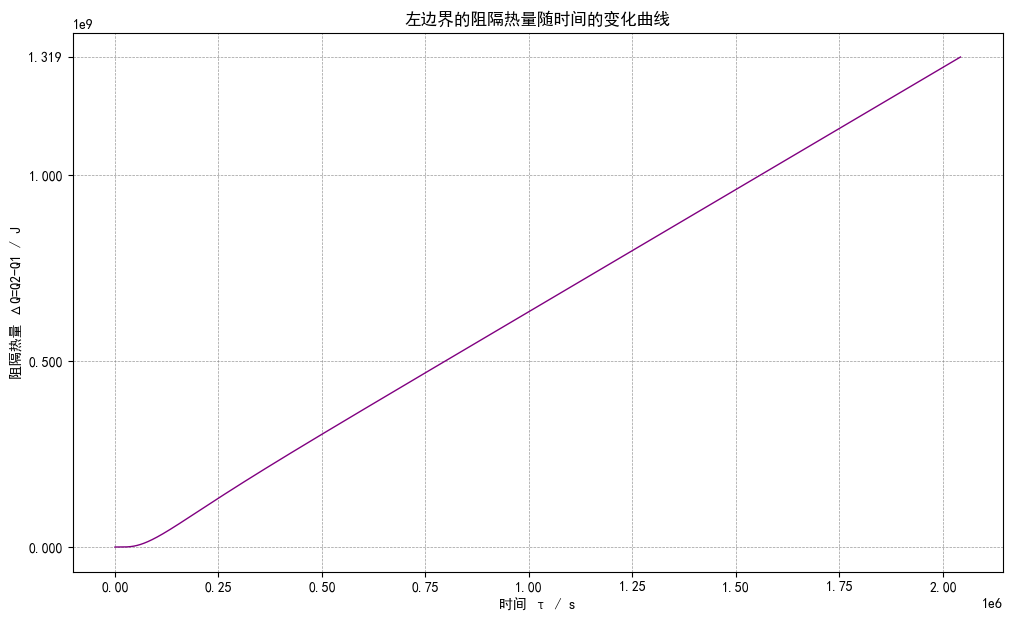

1318819294.4840558


In [29]:
t = np.linspace(Δτ,t_2*Δτ,_t2-1)
ΔQ_l = Q_2_l[1:_t2]-Q_1_l[1:_t2]

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t[:],ΔQ_l[:],color='purple',linewidth=1)
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('左边界的阻隔热量随时间的变化曲线')
ax.set_xlabel('时间 τ / s')
ax.set_ylabel('阻隔热量 ΔQ=Q2-Q1 / J')
ax.yaxis.set_major_locator(FixedLocator([0,5e8,1e9,1318819294.4840558]))
plt.show()
print(ΔQ_l[-1])

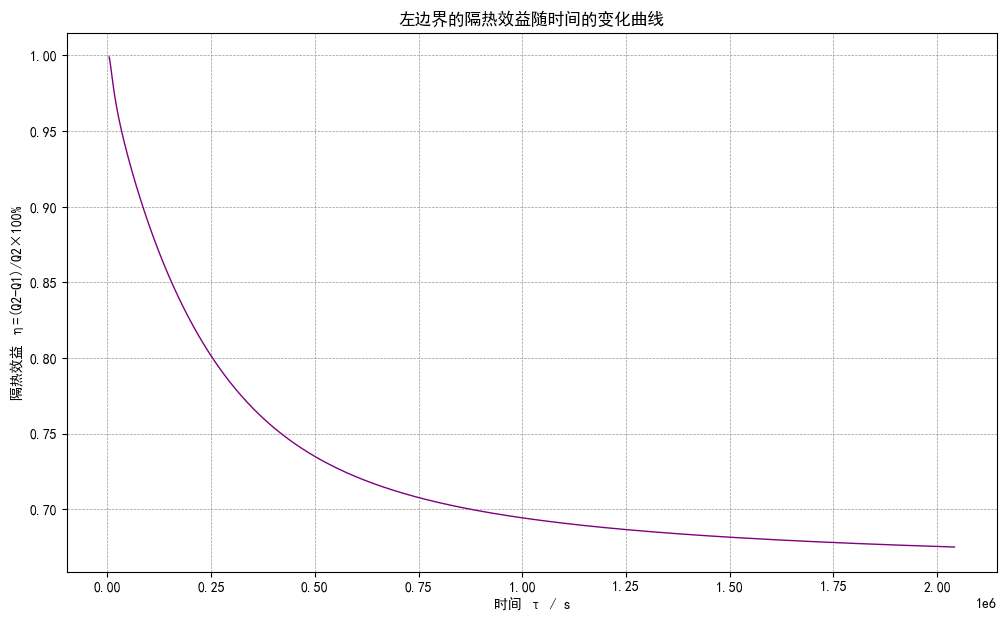

In [30]:
t = np.linspace(Δτ,t_2*Δτ,_t2-1)
heat_loss_ratio_l = (Q_2_l[1:_t2]-Q_1_l[1:_t2])/(Q_2_l[1:_t2]+1.0e-12)

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t[380:],heat_loss_ratio_l[380:],color='purple',linewidth=1)
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('左边界的隔热效益随时间的变化曲线')
ax.set_xlabel('时间 τ / s')
ax.set_ylabel('隔热效益 η=(Q2-Q1)/Q2×100%')
ax.yaxis.set_major_locator(FixedLocator([0.7,0.75,0.8,0.85,0.9,0.95,1.0]))
plt.show()

2. 右边界：

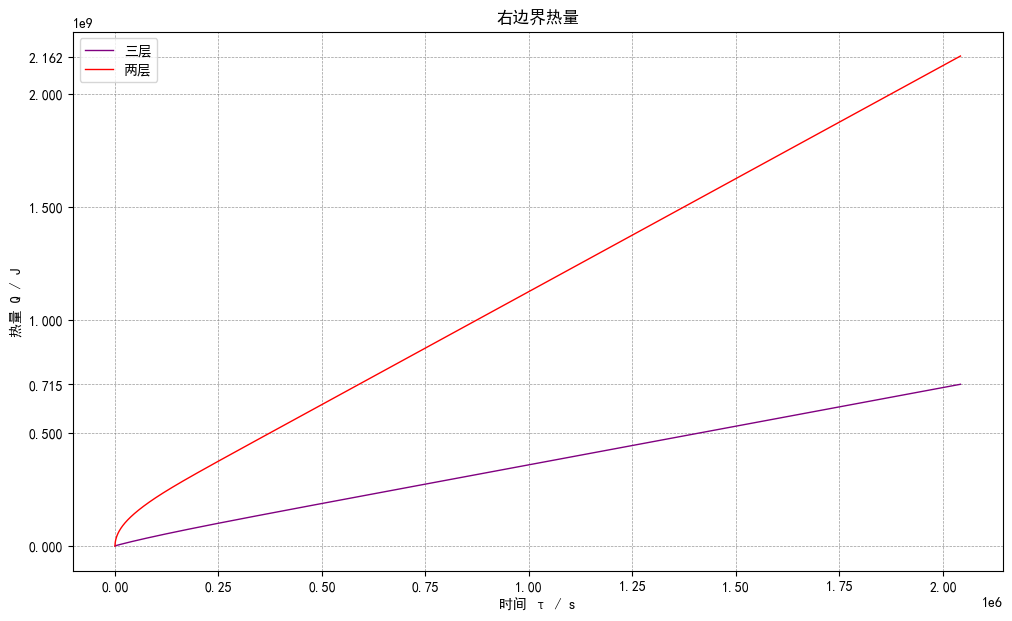

三层导热材料的情况：直到系统达到平衡时，通过右边界的总热量 = 7.149e+08
两层导热材料的情况：直到系统达到平衡时，通过右边界的总热量 = 2.162e+09


In [31]:
Q_total_1_r,Q_1_r,_t1 = CalculateHeatOfRightBoundary(q_1_r,T_1[:,-2],t_1,Δτ,param_1[2,1],param_1[2,2],mesh_1[2,-1]-mesh_1[2,-2])
t1 = np.linspace(0,t_1*Δτ,_t1)
Q_total_2_r,Q_2_r,_t2 = CalculateHeatOfRightBoundary(q_2_r,T_2[:,-2],t_2,Δτ,param_2[1,1],param_2[1,2],mesh_2[1,-1]-mesh_2[1,-2])
t2 = np.linspace(0,t_2*Δτ,_t2)

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t1,Q_1_r,color='purple',linewidth=1,label='三层')
ax.plot(t2,Q_2_r,color='red',linewidth=1,label='两层')
ax.legend()
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('右边界热量')
ax.set_xlabel('时间 τ / s')
ax.set_ylabel('热量 Q / J')
ax.yaxis.set_major_locator(FixedLocator([0.0,5e8,7.150e+08,1e9,1.5e9,2e9,2.162e+09]))
plt.show()

print(f'三层导热材料的情况：直到系统达到平衡时，通过右边界的总热量 = {Q_total_1_r:.3e}')
print(f'两层导热材料的情况：直到系统达到平衡时，通过右边界的总热量 = {Q_total_2_r:.3e}')

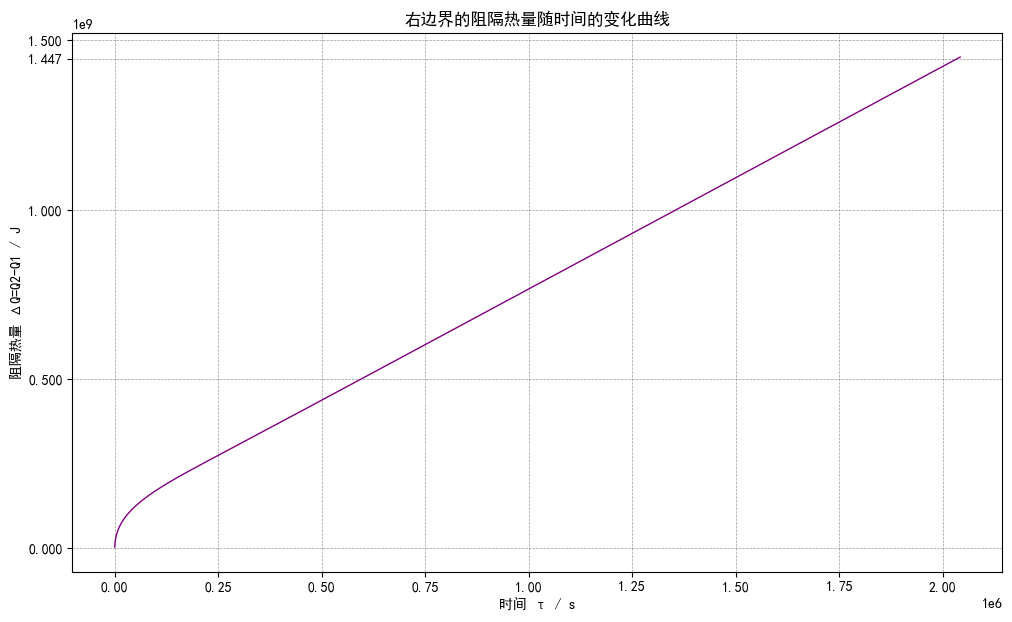

1451086890.2563386


In [32]:
t = np.linspace(Δτ,t_2*Δτ,_t2-1)
ΔQ_r = Q_2_r[1:_t2]-Q_1_r[1:_t2]

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t[0:],ΔQ_r[0:],color='purple',linewidth=1)
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('右边界的阻隔热量随时间的变化曲线')
ax.set_xlabel('时间 τ / s')
ax.set_ylabel('阻隔热量 ΔQ=Q2-Q1 / J')
ax.yaxis.set_major_locator(FixedLocator([0,5e8,1e9,1446588981.1935496,1.5e9]))
plt.show()
print(ΔQ_r[-1])

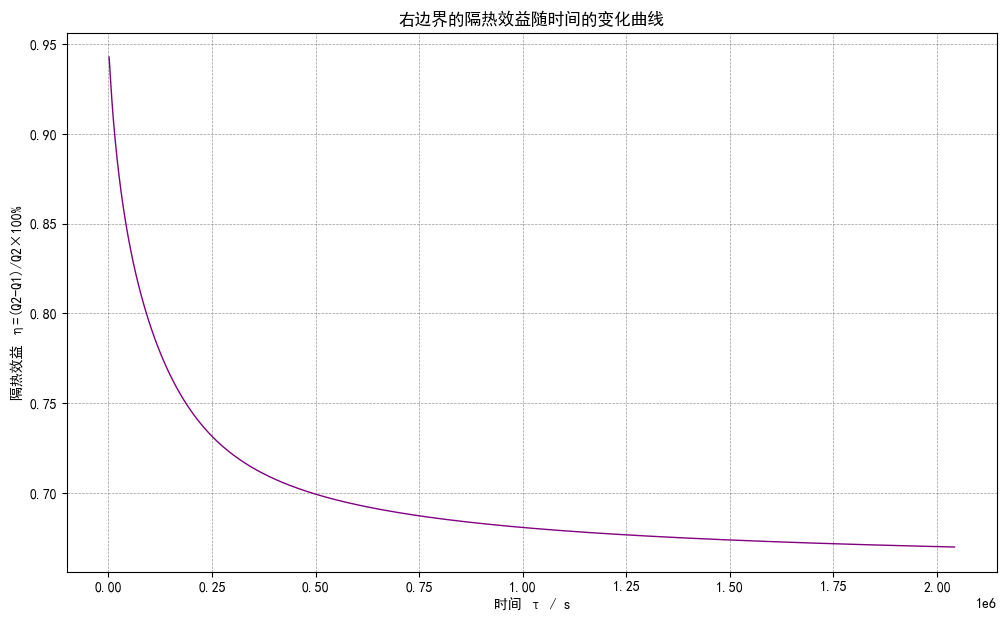

In [33]:
t = np.linspace(Δτ,t_2*Δτ,_t2-1)
heat_loss_ratio_r = (Q_2_r[1:_t2]-Q_1_r[1:_t2])/(Q_2_r[1:_t2]+1.0e-12)

fig,ax = plt.subplots(figsize=(12,7))
ax.plot(t[140:],heat_loss_ratio_r[140:],color='purple',linewidth=1)
ax.grid(which='major',color='gray',linestyle='--',linewidth=0.5,alpha=0.8)
ax.set_title('右边界的隔热效益随时间的变化曲线')
ax.set_xlabel('时间 τ / s')
ax.set_ylabel('隔热效益 η=(Q2-Q1)/Q2×100%')
ax.yaxis.set_major_locator(FixedLocator([0.7,0.75,0.8,0.85,0.9,0.95,1.0]))
plt.show()

# 网格独立性检验

In [34]:
mesh_resolution = 40
Δτ = 2.5

mesh_1p = np.array([np.linspace(0,i[0],mesh_resolution+1) for i in param_1])  # 三层情况的空间网格
mesh_2p = np.array([np.linspace(0,i[0],mesh_resolution+2) for i in param_2])  # 两层情况的空间网格

T_1p, t_1p, m_1p, *_ = GaussSeidelSolver(param_1,mesh_1p,Δτ,auto_stop=True)
T_2p, t_2p, m_2p, *_ = GaussSeidelSolver(param_2,mesh_2p,Δτ,auto_stop=False,time_step_maximum=t_1p)

q_1p_r,*_ = CalculateHeatTransferRateOfRightBoundary(T_1p[0:t_1p,-3:],mesh_1p[2,-1]-mesh_1p[2,-2],param_1[2,3])
q_2p_r,*_ = CalculateHeatTransferRateOfRightBoundary(T_2p[0:t_2p,-3:],mesh_2p[1,-1]-mesh_2p[1,-2],param_2[1,3])

Q_total_1p_r,Q_1p_r,t_1p = CalculateHeatOfRightBoundary(q_1p_r,T_1p[:,-2],t_1p,Δτ,param_1[2,1],param_1[2,2],mesh_1p[2,-1]-mesh_1p[2,-2])
Q_total_2p_r,Q_2p_r,t_2p = CalculateHeatOfRightBoundary(q_2p_r,T_2p[:,-2],t_2p,Δτ,param_2[1,1],param_2[1,2],mesh_2p[1,-1]-mesh_2p[1,-2])

q_1p_l,*_ = CalculateHeatTransferRateOfLeftBoundary(T_1p[0:t_1p,0:3],mesh_1p[0,1]-mesh_1p[0,0],param_1[0,3])
q_2p_l,*_ = CalculateHeatTransferRateOfLeftBoundary(T_2p[0:t_2p,0:3],mesh_2p[0,1]-mesh_2p[0,0],param_2[0,3])

Q_total_1p_l,Q_1p_l,t_1p = CalculateHeatOfLeftBoundary(q_1p_l,T_1p[:,0],t_1p,Δτ,param_1[0,1],param_1[0,2],mesh_1p[0,1]-mesh_1p[0,0])
Q_total_2p_l,Q_2p_l,t_2p = CalculateHeatOfLeftBoundary(q_2p_l,T_2p[:,0],t_2p,Δτ,param_2[0,1],param_2[0,2],mesh_2p[0,1]-mesh_2p[0,0])

In [35]:
# 选公共点
print(t_1*10)
print(t_1p*2.5)
t1=816884
t2=204221

print("左边界：")
print(f"\t较疏的网格：ΔQ = {Q_2_l[t2-1]-Q_1_l[t2-1]}")
print(f"\t较密的网格：ΔQ = {Q_2p_l[t1-1]-Q_1p_l[t1-1]}")
print(f"\t相差：{np.abs((Q_2_l[t2-1]-Q_1_l[t2-1])-(Q_2p_l[t1-1]-Q_1p_l[t1-1]))}")
print(f"\t相对变化率：{np.abs((Q_2p_l[t1-1]-Q_1p_l[t1-1])-(Q_2_l[t2-1]-Q_1_l[t2-1]))/(Q_2_l[t2-1]-Q_1_l[t2-1])}")
print("右边界：")
print(f"\t较疏的网格：ΔQ = {Q_2_r[t2-1]-Q_1_r[t2-1]}")
print(f"\t较密的网格：ΔQ = {Q_2p_r[t1-1]-Q_1p_r[t1-1]}")
print(f"\t相差：{np.abs((Q_2_r[t2-1]-Q_1_r[t2-1])-(Q_2p_r[t1-1]-Q_1p_r[t1-1]))}")
print(f"\t相对变化率：{np.abs((Q_2p_r[t1-1]-Q_1p_r[t1-1])-(Q_2_r[t2-1]-Q_1_r[t2-1]))/(Q_2_r[t2-1]-Q_1_r[t2-1])}")

2042280
2042215.0
左边界：
	较疏的网格：ΔQ = 1318773277.7222228
	较密的网格：ΔQ = 1318759039.795104
	相差：14237.927118778229
	相对变化率：1.0796341842298996e-05
右边界：
	较疏的网格：ΔQ = 1451040873.498776
	较密的网格：ΔQ = 1451049063.3662133
	相差：8189.867437362671
	相对变化率：5.644132833843002e-06


In [36]:
mesh_resolution = 10
Δτ = 40

mesh_1s = np.array([np.linspace(0,i[0],mesh_resolution+1) for i in param_1])  # 三层情况的空间网格
mesh_2s = np.array([np.linspace(0,i[0],mesh_resolution+2) for i in param_2])  # 两层情况的空间网格

T_1s, t_1s, m_1s, *_ = GaussSeidelSolver(param_1,mesh_1s,Δτ,auto_stop=True)
T_2s, t_2s, m_2s, *_ = GaussSeidelSolver(param_2,mesh_2s,Δτ,auto_stop=False,time_step_maximum=t_1s)

q_1s_r,*_ = CalculateHeatTransferRateOfRightBoundary(T_1s[0:t_1s,-3:],mesh_1s[2,-1]-mesh_1s[2,-2],param_1[2,3])
q_2s_r,*_ = CalculateHeatTransferRateOfRightBoundary(T_2s[0:t_2s,-3:],mesh_2s[1,-1]-mesh_2s[1,-2],param_2[1,3])

Q_total_1s_r,Q_1s_r,t_1s = CalculateHeatOfRightBoundary(q_1s_r,T_1s[:,-2],t_1s,Δτ,param_1[2,1],param_1[2,2],mesh_1s[2,-1]-mesh_1s[2,-2])
Q_total_2s_r,Q_2s_r,t_2s = CalculateHeatOfRightBoundary(q_2s_r,T_2s[:,-2],t_2s,Δτ,param_2[1,1],param_2[1,2],mesh_2s[1,-1]-mesh_2s[1,-2])

q_1s_l,*_ = CalculateHeatTransferRateOfLeftBoundary(T_1s[0:t_1s,0:3],mesh_1s[0,1]-mesh_1s[0,0],param_1[0,3])
q_2s_l,*_ = CalculateHeatTransferRateOfLeftBoundary(T_2s[0:t_2s,0:3],mesh_2s[0,1]-mesh_2s[0,0],param_2[0,3])

Q_total_1s_l,Q_1s_l,t_1s = CalculateHeatOfLeftBoundary(q_1s_l,T_1s[:,0],t_1s,Δτ,param_1[0,1],param_1[0,2],mesh_1s[0,1]-mesh_1s[0,0])
Q_total_2s_l,Q_2s_l,t_2s = CalculateHeatOfLeftBoundary(q_2s_l,T_2s[:,0],t_2s,Δτ,param_2[0,1],param_2[0,2],mesh_2s[0,1]-mesh_2s[0,0])

In [37]:
# 选公共点
print(t_1s*40)
print(t_1*10)
print(t_1p*2.5)
t3 = 51051
t2 = 204204
t1 = 816816

print("左边界")
e32 = np.abs(Q_1s_l[t3-1]-Q_1_l[t2-1])
e21 = np.abs(Q_1_l[t2-1]-Q_1p_l[t1-1])
p = np.log(e32/e21)/np.log(2)
print(f"\t观测收敛阶 = {p}")
gci32=1.25*e32/(2**p-1)
gci21=1.25*e21/(2**p-1)
print(f"\tGCI32 = {gci32}")
print(f"\tGCI21 = {gci21}")
print(f"\t是否收敛？{np.abs(gci32/((2**p)*gci21)-1)<1e-6}")

print("右边界")
e32 = np.abs(Q_1s_r[t3-1]-Q_1_r[t2-1])
e21 = np.abs(Q_1_r[t2-1]-Q_1p_r[t1-1])
p = np.log(e32/e21)/np.log(2)
print(f"\t观测收敛阶 = {p}")
gci32=1.25*e32/(2**p-1)
gci21=1.25*e21/(2**p-1)
print(f"\tGCI32 = {gci32}")
print(f"\tGCI21 = {gci21}")
print(f"\t是否收敛？{np.abs(gci32/((2**p)*gci21)-1)<1e-6}")

2042040
2042280
2042215.0
左边界
	观测收敛阶 = 2.0001768396146957
	GCI32 = 1139.1232778037813
	GCI21 = 284.74591433060453
	是否收敛？True
右边界
	观测收敛阶 = 2.0003781120424473
	GCI32 = 626.9425846140365
	GCI21 = 156.69457311439314
	是否收敛？True
